<a href="https://colab.research.google.com/github/RaffyJO/machine-learning-2024/blob/main/ML-Week6-Ensemble%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Week 06 - Ensemble Learning**
<br>
Nama: Raffy Jamil Octavialdy
<br>
Kelas: TI - 3D
<br>
NIM: 2241720082

# **Praktikum 1 - Bagging**

**Import Library**

In [1]:
# Import Library

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

**Persiapan Data**

In [3]:
# Load data
df = pd.read_csv('wbc.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Cek kolom null
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal_dimension_worst'
X = df.iloc[:,3:-1]
y = df['diagnosis']
y = y.map({'M':1, 'B':0}) # Encode label

# Cek jumlah fitur dan instance
X.shape

(569, 29)

**Split data training dan testing**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Traning Decision Tree**

In [7]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.95
Test set accuracy: 0.9473684210526315


**Training RandomForest**

In [8]:
# Pada kasus kali ini kita akan menggunakan estimator pada RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.96
Test set accuracy: 0.956140350877193


# **Tugas**

## **Tugas 1**

Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

**Import Library**

In [9]:
# Import Library

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

**Load Data**

In [10]:
# Load data
df_1 = pd.read_csv('mushrooms.csv')

df_1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
# Cek kolom null
df_1.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [12]:
# Cek data imbalance

class_counts = df_1['class'].value_counts()

print(class_counts)

class
e    4208
p    3916
Name: count, dtype: int64


In [13]:
df_1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [14]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'cap-shape' sampai 'habitat'
X_1 = df_1.loc[:, 'cap-shape':'habitat']
y_1 = df_1['class']

X_1 = pd.get_dummies(X_1, dtype=int)
y_1 = pd.get_dummies(y_1, dtype=int)

**Check Data Imbalance**

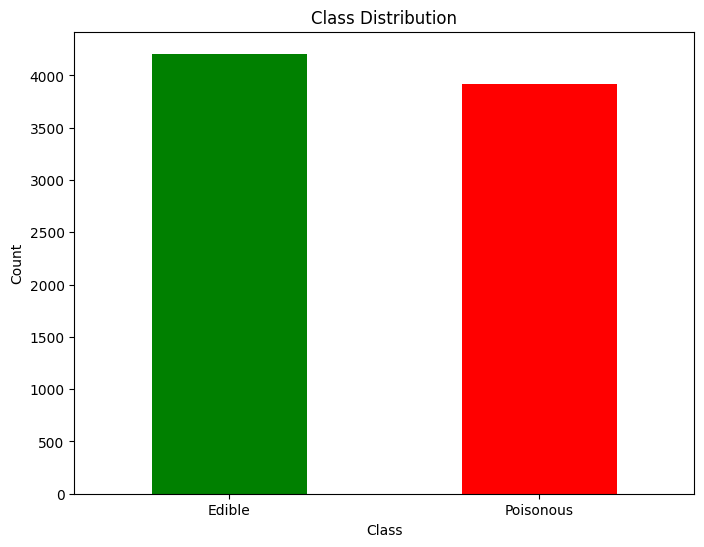

In [15]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'], rotation=0)
plt.show()

In [16]:
# Calculate Class Imbalance Ratios
class_ratios = {class_label: count / len(y_1) for class_label, count in class_counts.items()}

# Print Class Distribution Statistics
print("Class Distribution in Mushrooms Dataset:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples ({class_ratios[class_label]*100:.2f}% of total)")

# Find the Imbalanced Classes (if any)
imbalanced_classes = [class_label for class_label, ratio in class_ratios.items() if ratio < 0.05]
if len(imbalanced_classes) > 0:
    print("Imbalanced Classes:", imbalanced_classes)
else:
    print("The dataset is approximately balanced.")

Class Distribution in Mushrooms Dataset:
Class e: 4208 samples (51.80% of total)
Class p: 3916 samples (48.20% of total)
The dataset is approximately balanced.


**Split data training dan testing**

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2)

**Traning Decision Tree**

In [20]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train_1, y_train_1)

# Memprediksi label set test
y_test_pred_dt_1 = dt.predict(X_test_1)

#  menghitung set accuracy test
acc_test_dt_1 = accuracy_score(y_test_1, y_test_pred_dt_1)
print(f"Test set accuracy: {acc_test_dt_1*100:.2f}%")

# Memprediksi label set training
y_train_pred_dt_1 = dt.predict(X_train_1)

#  menghitung set accuracy training
acc_train_dt_1 = accuracy_score(y_train_1, y_train_pred_dt_1)
print(f"Train set accuracy: {acc_train_dt_1*100:.2f}%")

Test set accuracy: 100.00%
Train set accuracy: 100.00%


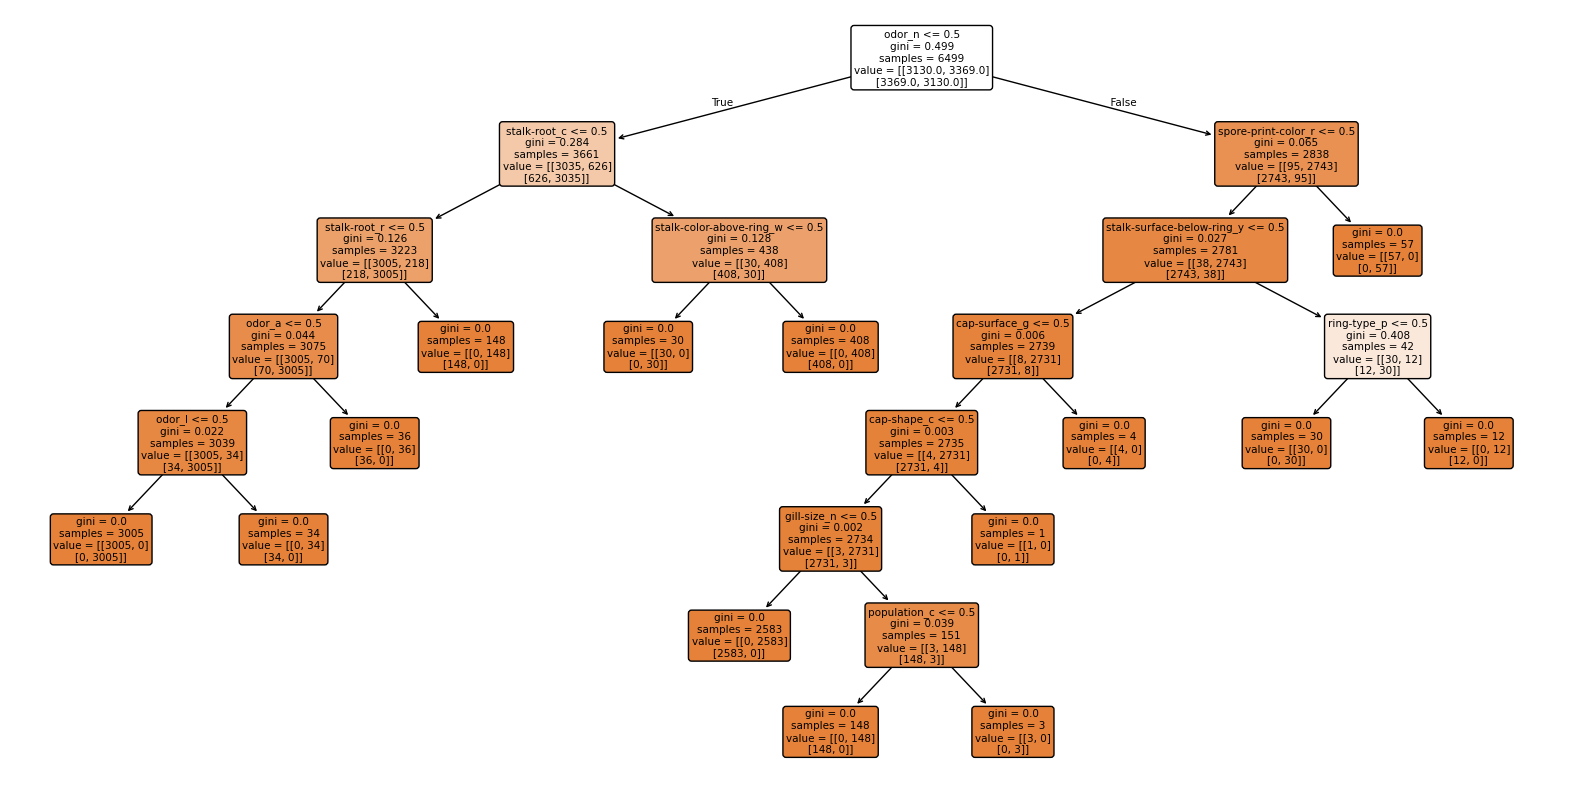

In [21]:
# Gambar Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
plot_tree(dt, filled=True, feature_names=X_1.columns, class_names=['edible', 'poisonous'], rounded=True)
plt.show()

**Training Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Pada kasus kali ini kita akan menggunakan estimator pada RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train_1, y_train_1)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test_1)

#  menghitung set accuracy
acc_test_rf = accuracy_score(y_test_1, y_pred_rf)
print(f"Test set accuracy: {acc_test_rf*100:.2f}%")

# Memprediksi label set train
y_pred_train_rf = rf.predict(X_train_1)

#  menghitung set accuracy train
acc_train_rf = accuracy_score(y_train_1, y_pred_train_rf)
print(f"Train set accuracy: {acc_train_rf *100:.2f}%")

Test set accuracy: 100.00%
Train set accuracy: 100.00%


## **Tugas 2**

Terdapat dataset mushroom. Berdasarkan dataset tersebut, bandingkan peforma antara algoritma Decision Tree dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

**Import Library**

In [23]:
# Import Library

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Kebutuhan encoding label

**Load Data**

In [24]:
# Load data
df_2 = pd.read_csv('mushrooms.csv')

df_2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
# Cek kolom null
df_2.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [26]:
df_2.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Seleksi Fitur**

In [27]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'cap-shape' sampai 'habitat'
X_2 = df_1.loc[:, 'cap-shape':'habitat']
y_2 = df_1['class']

# encode label
ec = LabelEncoder()
y_2 = ec.fit_transform(y_2)
X_2 = pd.get_dummies(X_2, dtype=int)

**Split data train and test**

In [28]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=1)

**Training decision tree**

In [29]:
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train_2, y_train_2)

# Memprediksi label set test
y_test_pred_dt_2 = dt.predict(X_test_2)

#  menghitung set accuracy test
acc_test_dt_2 = accuracy_score(y_test_2, y_test_pred_dt_2)
print(f"Test set accuracy: {acc_test_dt_2*100:.2f}%")

# Memprediksi label set training
y_train_pred_dt_2 = dt.predict(X_train_2)

#  menghitung set accuracy training
acc_train_dt_2 = accuracy_score(y_train_2, y_train_pred_dt_2)
print(f"Train set accuracy: {acc_train_dt_2*100:.2f}%")

Test set accuracy: 100.00%
Train set accuracy: 100.00%


**Training Ada boost**

In [35]:
# Pada kasus kali ini kita akan menggunakan estimator pada AdaBoost
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi
ada = AdaBoostClassifier(n_estimators=50)

# Sesuaikan dt ke set training
ada.fit(X_train_2, y_train_2)

# Memprediksi label set test
y_pred_test_ada = ada.predict(X_test_2)
acc_ada_test = accuracy_score(y_test_2, y_pred_test_ada)
print(f"Test set accuracy: {acc_ada_test *100:.2f}%")

# Memprediksi label set training
y_pred_train_ada = ada.predict(X_train_2)

#  menghitung set accuracy training
acc_ada_train = accuracy_score(y_train_2, y_pred_train_ada)
print(f"Train set accuracy: {acc_ada_train*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test set accuracy: 100.00%
Train set accuracy: 100.00%


## **Tugas 3**

Dengan menggunakan dataset diabetes, buatlah ensemble voting dengan algoritma
1. Logistic Regression
2. SVM kernel polynomial
3. Decission Tree

Anda boleh melakukan eksplorasi dengan melakukan tunning hyperparameter

**Import Library**

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression # import Logistic Regression
from sklearn.svm import SVC # import SVM classifier
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

**Load Data**

In [37]:
# Load data
df_3 = pd.read_csv('diabetes.csv')

df_3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# Cek kolom null
df_3.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


- Tidak masuk akal jika beberapa parameter bernilai 0 seperti nilai 'Glucose', 'BloodPlessure' ataupun 'Insulin'.
- Sekecil apapun nilainya, setiap manusia yang hidup pasti miliki nilai-nilai tersebut

Kita akan manipulasi nilai yang 0 dengan melakukan 'imputasi' atau mengganti nilainya dengan nilai sintetis. Pada kasus ini, kita akan menggunakan nilai mean

In [50]:
# Cek kolom bernilai 0
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("-----------------------------------------------")
    print(f"{column} ==> Missing zeros : {len(df_3.loc[df_3[column] == 0])}")

-----------------------------------------------
Pregnancies ==> Missing zeros : 0
-----------------------------------------------
Glucose ==> Missing zeros : 0
-----------------------------------------------
BloodPressure ==> Missing zeros : 0
-----------------------------------------------
SkinThickness ==> Missing zeros : 0
-----------------------------------------------
Insulin ==> Missing zeros : 0
-----------------------------------------------
BMI ==> Missing zeros : 0
-----------------------------------------------
DiabetesPedigreeFunction ==> Missing zeros : 0
-----------------------------------------------
Age ==> Missing zeros : 0


In [51]:
# Impute nilai 0 dengan mean
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df_3[feature_columns] = fill_values.fit_transform(df_3[feature_columns])

**Check Data Imbalance**

In [52]:
# Cek data imbalance

class_counts = df_3[feature_columns].value_counts()

print(class_counts)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI   DiabetesPedigreeFunction  Age 
1.0          71.0     48.0           18.00000       76.000000   20.4  0.323                     22.0    1
                      62.0           29.15342       155.548223  21.8  0.416                     26.0    1
5.0          104.0    74.0           29.15342       155.548223  28.8  0.153                     48.0    1
             105.0    72.0           29.00000       325.000000  36.9  0.159                     28.0    1
             106.0    82.0           30.00000       155.548223  39.5  0.286                     38.0    1
                                                                                                       ..
3.0          100.0    68.0           23.00000       81.000000   31.6  0.949                     28.0    1
             102.0    44.0           20.00000       94.000000   30.8  0.400                     26.0    1
                      74.0           29.15342      

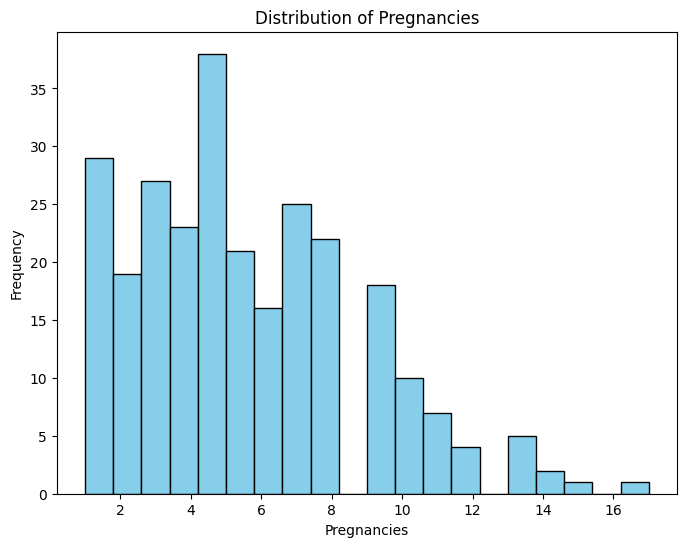

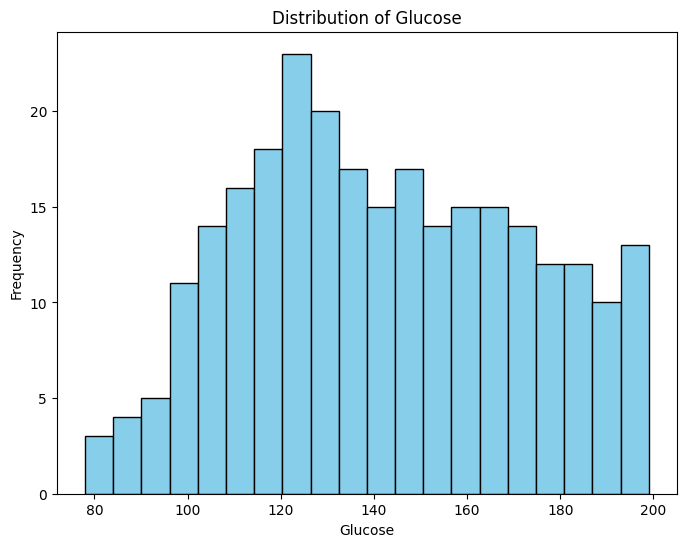

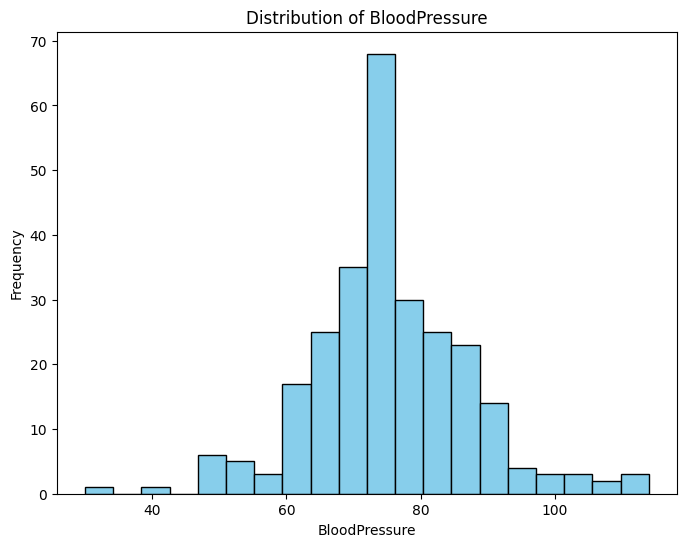

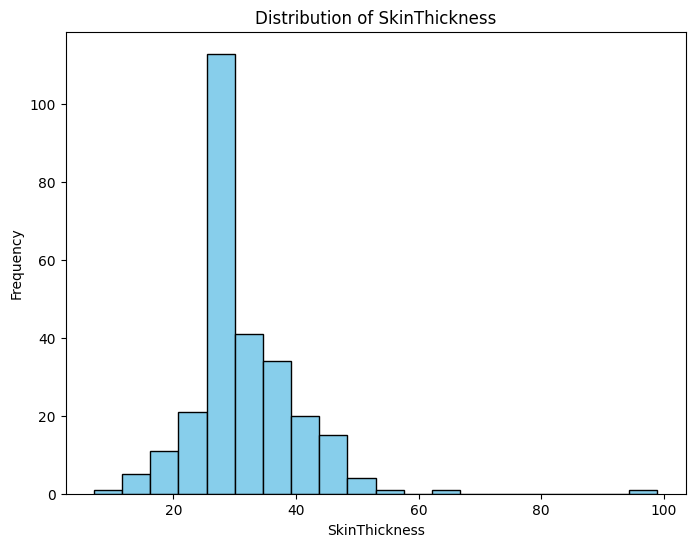

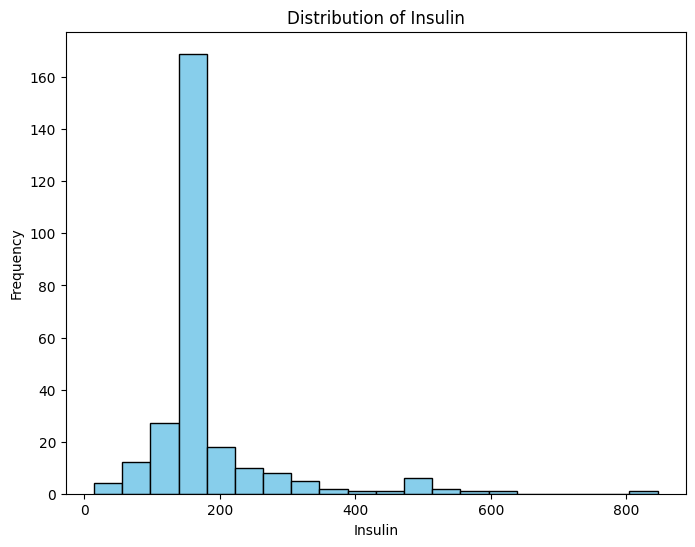

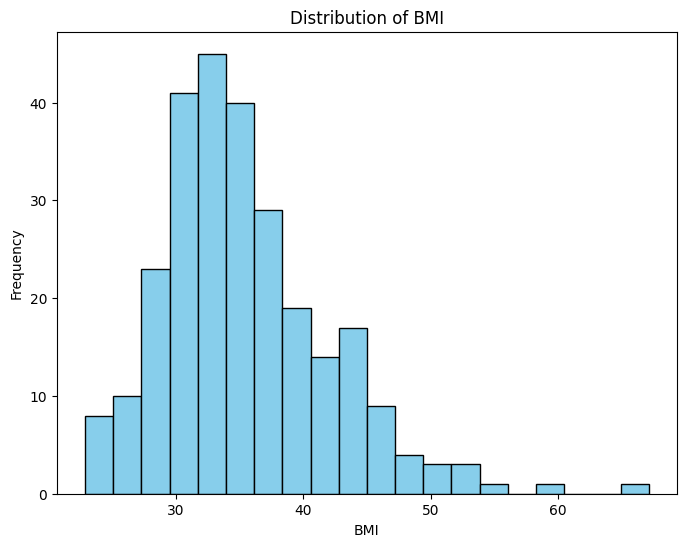

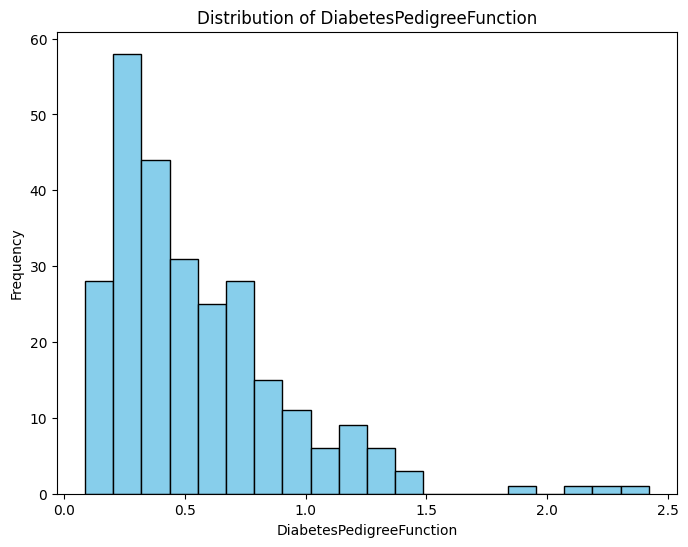

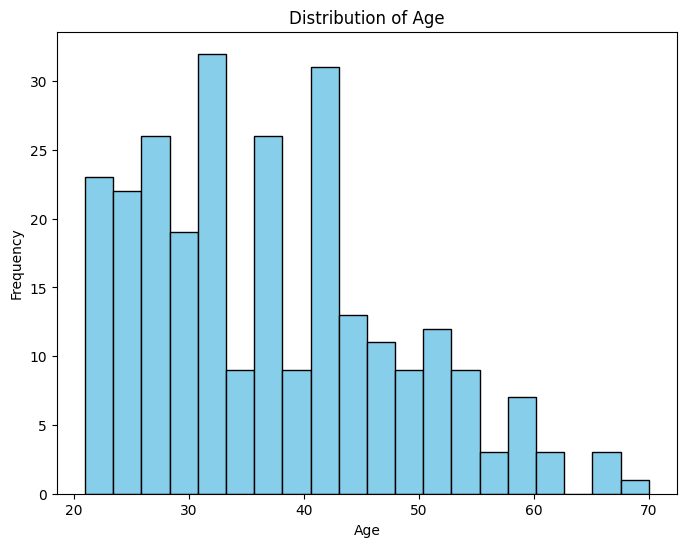

In [53]:
import matplotlib.pyplot as plt

# Loop through each feature and create a histogram
for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_3[df_3['Outcome'] == 1][feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

**Split data test & train**

In [57]:
X = df_3[feature_columns]
y = df_3.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train data using Voting Algorithm**

In [58]:
# Definisikan algoritma yang akan digunakan untuk voting

clf1 = LogisticRegression(max_iter=1000)
clf2 = SVC(kernel='poly')
clf3 = DecisionTreeClassifier()

# model hard voting
voting = VotingClassifier(estimators=[('LogisticRegression', clf1), ('SVM-Polynomial', clf2), ('DecisionTree', clf3)], voting='hard')

# Fit model
voting.fit(X_train, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print(f"Test set accuracy: {acc_vt1*100:.2f}%")

# Prediksi train
y_pred_train_vt1 = voting.predict(X_train)

# Evaluasi akurasi train data
acc_train_vt1 = accuracy_score(y_train, y_pred_train_vt1)

# Print hasil evaluasi
print(f"Train set accuracy: {acc_train_vt1*100:.2f}%")

Voting Hard
Test set accuracy: 75.97%
Train set accuracy: 80.94%


**Scale Data**

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Your feature columns and target variable
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df_3[feature_columns]
y = df_3.Outcome

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance and fit it on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train data after scale data**

In [60]:
# Definisikan algoritma yang akan digunakan untuk voting
clf1 = LogisticRegression(max_iter=1000)
clf2 = SVC(kernel='poly')
clf3 = DecisionTreeClassifier()

# model hard voting
voting = VotingClassifier(estimators=[('LogisticRegression', clf1), ('SVM-Polynomial', clf2), ('DecisionTree', clf3)], voting='hard')

# Fit model
voting.fit(X_train_scaled, y_train)

# Prediksi for test set
y_pred_test = voting.predict(X_test_scaled)

# Prediksi for train set
y_pred_train = voting.predict(X_train_scaled)

# Evaluasi akurasi for test set
acc_test = accuracy_score(y_test, y_pred_test)

# Evaluasi akurasi for train set
acc_train = accuracy_score(y_train, y_pred_train)

# Print hasil evaluasi
print('Voting Hard')
print(f"Test set accuracy: {acc_test*100:.2f}%")
print(f"Train set accuracy: {acc_train*100:.2f}%")

Voting Hard
Test set accuracy: 77.27%
Train set accuracy: 84.36%


In [64]:
!jupyter nbconvert --to html /content/ML_Week6_Ensemble_Learning.ipynb

[NbConvertApp] Converting notebook /content/ML_Week6_Ensemble_Learning.ipynb to html
[NbConvertApp] Writing 1144993 bytes to /content/ML_Week6_Ensemble_Learning.html
